In [94]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [95]:
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [96]:
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


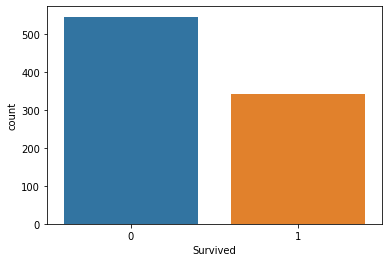

In [97]:
# print(len(data.index))
survived = sns.countplot(x='Survived', data=data)

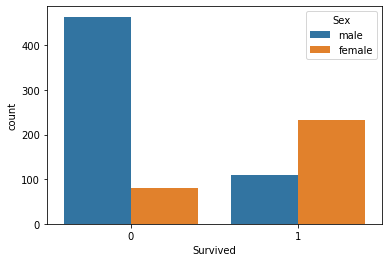

In [98]:
survived_gender = sns.countplot(x='Survived', hue='Sex', data=data)

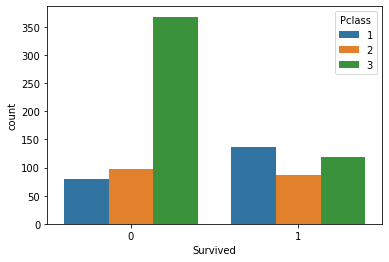

In [99]:
survived_gender = sns.countplot(x='Survived', hue='Pclass', data=data)

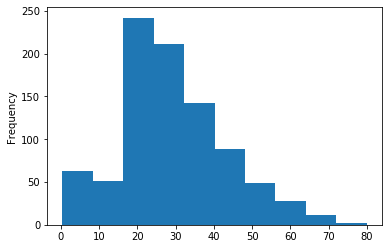

In [100]:
data['Age'].plot.hist()

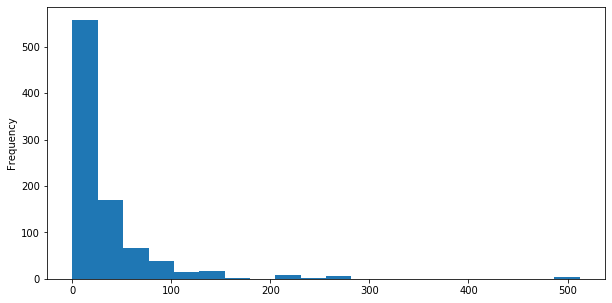

In [101]:
data['Fare'].plot.hist(bins=20, figsize=(10,5))

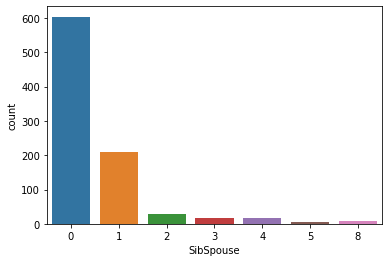

In [110]:
# data.rename(columns={'Siblings/Spouses Aboard':'SibSpouse'}, inplace=True)
sns.countplot(x='SibSpouse', data=data)

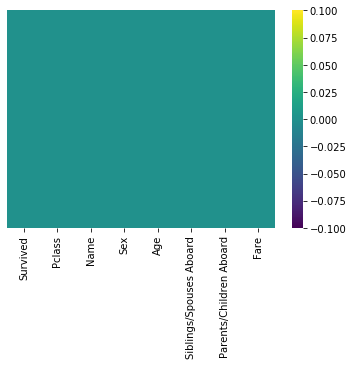

In [103]:
# data.isnull().sum()
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

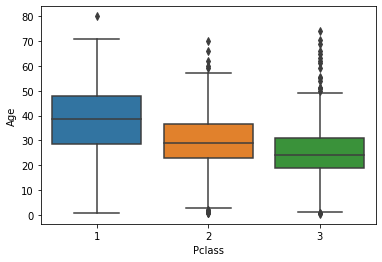

In [104]:
sns.boxplot(x='Pclass', y='Age', data=data)

In [105]:
data.head(4)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000


In [106]:
sex = pd.get_dummies(data['Sex'], drop_first=True)
sex.head(2)

,male
0,1
1,0


In [107]:
pcls = pd.get_dummies(data['Pclass'], drop_first=True)
pcls.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [118]:
data1 = pd.concat([data, sex, pcls], axis=1)
data1.head(5)

,Survived,Pclass,Name,Sex,Age,SibSpouse,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [132]:
# data1.drop(['Name', 'Sex'], axis=1, inplace=True)
# data1.rename(columns={'Parents/Children Aboard':'ParChild'}, inplace=True)
# data1.drop(['Pclass'], axis=1, inplace=True)

data1.head(5)

,Survived,Age,SibSpouse,ParChild,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *  #confusion_matrix, classification_report & accuracy_score

In [137]:
X = data1.drop('Survived', axis=1)
y = data['Survived']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [145]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)

In [150]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.79      0.80      0.79       162\n           1       0.68      0.68      0.68       105\n\n   micro avg       0.75      0.75      0.75       267\n   macro avg       0.74      0.74      0.74       267\nweighted avg       0.75      0.75      0.75       267\n'

In [152]:
confusion_matrix(y_test, predictions)

array([[129,  33],
       [ 34,  71]], dtype=int64)

In [153]:
accuracy_score(y_test, predictions)

0.7490636704119851